In [3]:
import numpy as np
import matplotlib.pyplot as plt

filename = "ASI3Launch.txt"  
data = np.loadtxt("data.txt", delimiter = ' ')

In [4]:
time = data[:, 0] 
time = time/1000    
print(time[0])
time = time - time[0]
print(time[0])
piezo_1 = data[:, 1]
piezo_2 = data[:, 2]
piezo_3 = data[:, 3]
#piezo_4 = filtered_data[:, 4]
accel_x = data[:,4]
accel_z = data[:,5]
accel_y = data[:,6]

0.465
0.0


In [ ]:
data = np.loadtxt("data_spare.txt", delimiter = ' ')
plt.plot(data[:,0], data)

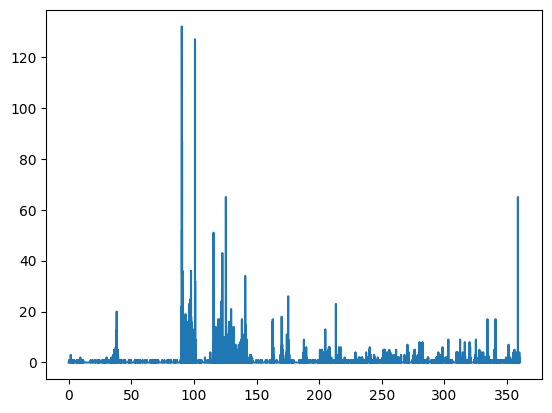

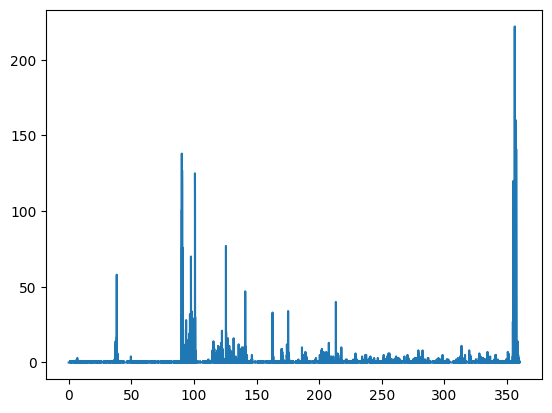

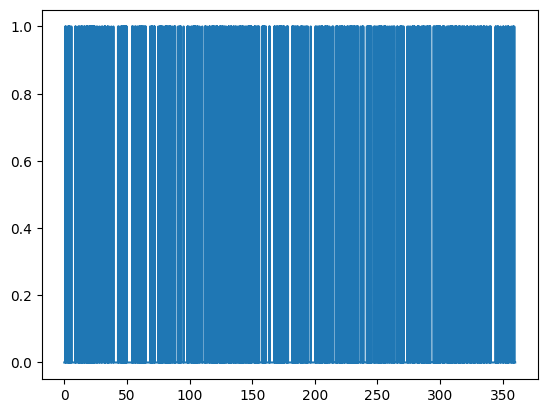

In [5]:
plt.plot(time, piezo_1)
plt.show()
plt.plot(time, piezo_2)
plt.show()
plt.plot(time, piezo_3)
plt.show()

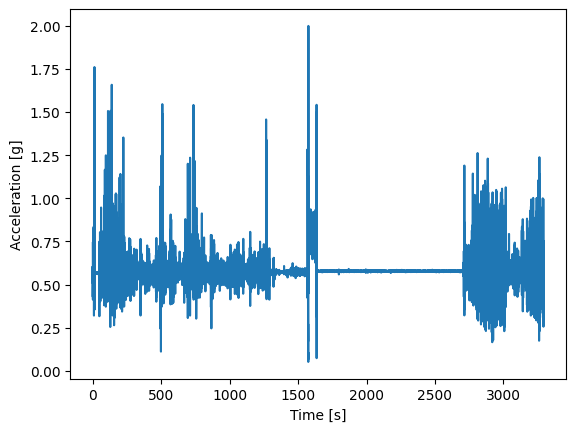

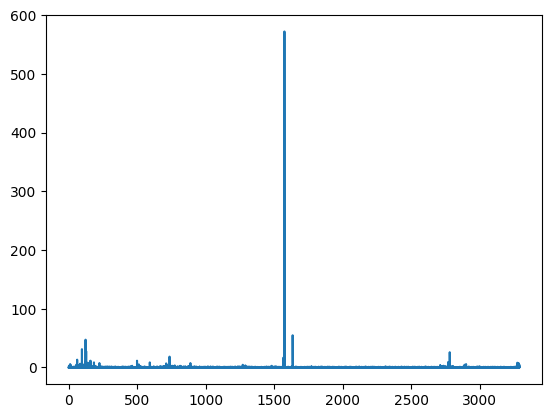

In [3]:
rms_accel = np.sqrt( (accel_x**2 + accel_y**2 + accel_z**2)/3 )/9.81

plt.plot(time, rms_accel)
plt.ylabel('Acceleration [g]')
plt.xlabel('Time [s]')
plt.show()

vibs_combi = np.sqrt( (piezo_2**2 +piezo_3**2 + piezo_1**2) / 3 )
plt.plot(time, vibs_combi)
plt.show()

In [4]:
# using the same vibration data for all training since other piezoelements are shite.
combined_data_wNoise = np.column_stack((time, vibs_combi, rms_accel))

np.savetxt('RMS_data_wNoise_ASI3.txt', combined_data_wNoise, delimiter=' ', fmt='%.10f' )

In [5]:
filtered_data = data[(data[:, 0] >= 1565000) & (data[:, 0] <= 1640000)]

time = filtered_data[:, 0] 
time = time/1000    
print(time[0])
time = time - 1565.013
print(time[0])
piezo_1 = filtered_data[:, 1]
piezo_2 = filtered_data[:, 2]
piezo_3 = filtered_data[:, 3]
#piezo_4 = filtered_data[:, 4]
accel_x = filtered_data[:,4]
accel_z = filtered_data[:,5]
accel_y = filtered_data[:,6]

RMS_algoTest = np.column_stack((time, piezo_1, piezo_2, piezo_3, accel_x, accel_y, accel_z))
np.savetxt('RMS_algoTest.txt', RMS_algoTest, delimiter=' ', fmt='%.10f' )

1565.013
0.0


## Combined Root mean squared acceleration of all three axes

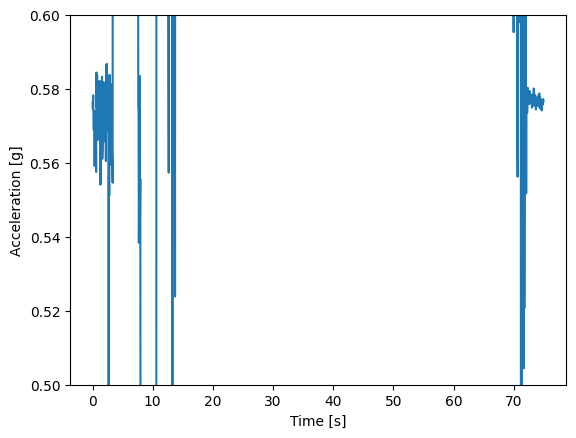

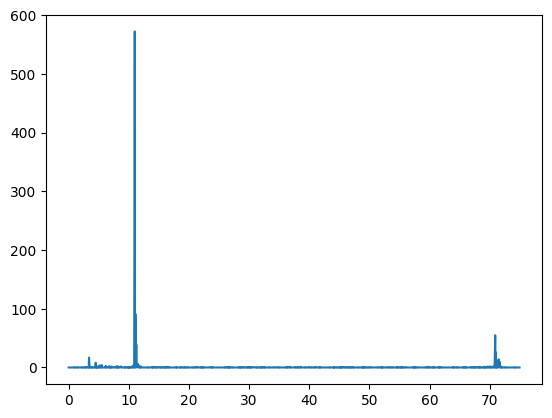

In [8]:
rms_accel = np.sqrt( (accel_x**2 + accel_y**2 + accel_z**2)/3 )/9.81

plt.plot(time, rms_accel)
plt.ylabel('Acceleration [g]')
plt.xlabel('Time [s]')
plt.ylim(0.5, 0.6)
plt.show()

vibs_combi = np.sqrt( (piezo_2**2 +piezo_3**2 + piezo_1**2) / 3 )
plt.plot(time, vibs_combi)
plt.show()

## Acceleration in Z and combined X,Y

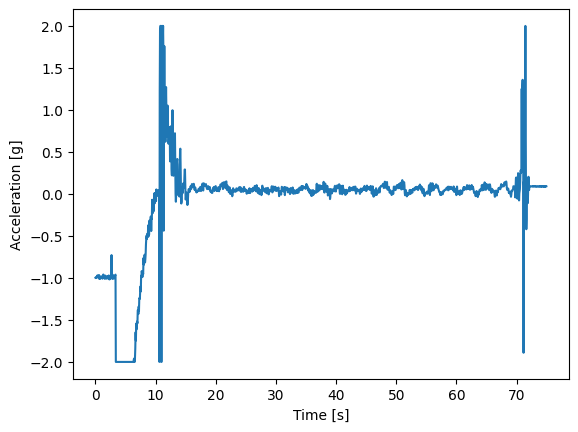

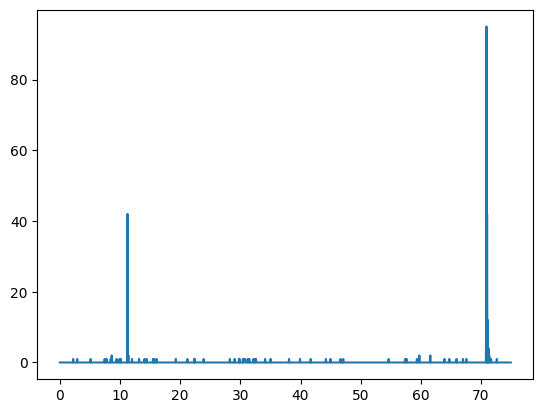

In [5]:
plt.plot(time, accel_z/9.81)
plt.ylabel('Acceleration [g]')
plt.xlabel('Time [s]')
plt.show()
plt.plot(time, piezo_3)
plt.show()

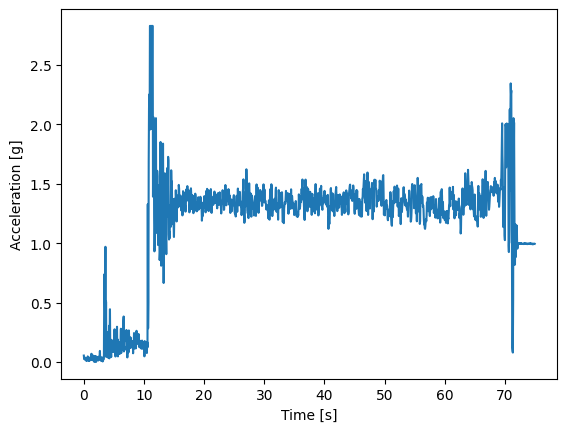

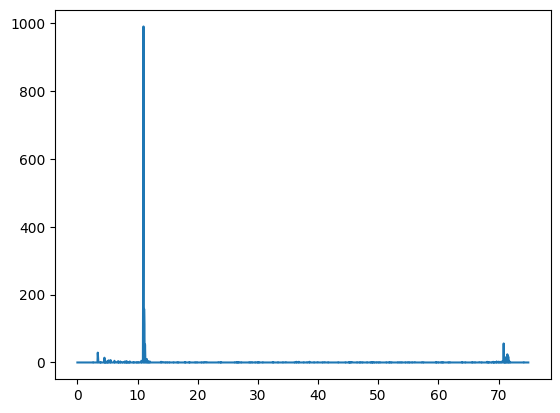

In [6]:
combi_xy = np.sqrt(accel_x**2 + accel_y**2)/9.81
plt.plot(time, combi_xy)
plt.ylabel('Acceleration [g]')
plt.xlabel('Time [s]')
plt.show()

plt.plot(time, piezo_2)
plt.show()

## Saving Data for training

In [9]:
# using the same vibration data for all training since other piezoelements are shite.
combined_data_all = np.column_stack((time, vibs_combi, rms_accel))
xy_data = np.column_stack((time, piezo_2, combi_xy))
z_data = np.column_stack((time, piezo_3, accel_z))

np.savetxt('RMS_data_ASI3.txt', combined_data_all, delimiter=' ', fmt='%.10f' )
np.savetxt('xy_data_ASI3.txt', xy_data, delimiter=' ', fmt='%.10f' )
np.savetxt('z_data_ASI3.txt', z_data, delimiter=' ', fmt='%.10f' )